# Exploratory Data Analysis
## Consumo de Agua
***
Laura Tejada, Yusuri Aciaga, Elena Villalobos, Carlos López

In [3]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Índice
***
 
 Veremos insights que se generaron a partir del análisis exploratorio de los datos.

- Introducción
- Contexto del problema
- Valores Faltantes
- Preguntas


## Introducción

 Se desarrollará un modelo para la estimación del índice de desarrollo para cierta geolocalización, dada la información del negocio.
 
 
 Para conocer el contexto y alcance de la información que tenemos hicimos un análisis en el que exploramos los datos, y generamos algunos insights sobre nuestros hallazgos. Consideramos los siguientes enfoques:

- Contexto del fenómeno
- Sobre el comportamiento de los datos
- Sobre valores faltantes
- Preguntas/Siguientes Pasos

#### NOTAS DEL EXPOSITOR (LAU):

Aún no tengo nada hehe sorry

## Profiling

- Más de 71,000 registros.
- 17 variables.
    - 12 numéricas: sobre consumo, geolocalización y fecha
    - 5 categóricas: sobre alcaldías, colonias e índice de desarrollo
- Tipos de uso según el inmueble: doméstico, no doméstico y mixto.
- Información de tres bimestres de 2019.
- Cuatro categorías para medir el índice de desarrollo.

Fuentes externas:
- Número de habitantes por región extraído de INEGI

#### NOTAS DEL EXPOSITOR (LAU):

IDEAS:
- Tenemos información de tres bimestres de 2019, ¿será que se perdió la info de algunos bimestres?, ¿el etiquetado del número de bimestre corresponde con los primeros tres bimestres del año, o en qué fechas se sitúan?
- Explicar que variable nomgeo tenía un error ortográfico.
- Fecha se compone de bimestre y año (bimestre la usamos como categórica)
- 16 alcaldías y 1340 colonias.


## Contexto del Problema

### ¿Hay más consumo total de agua para uso doméstico o para el no doméstico? ¿Entre las alcaldías es clara esta diferencia?

In [4]:
agua = pd.read_csv("data_consumo_agua.csv")

In [5]:
dom_no = pd.DataFrame(agua,columns=['alcaldia','consumo_total_dom','consumo_total_no_dom'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['consumo_total_dom'], ascending=False)\
.melt(id_vars='alcaldia')\

<AxesSubplot:xlabel='value', ylabel='alcaldia'>

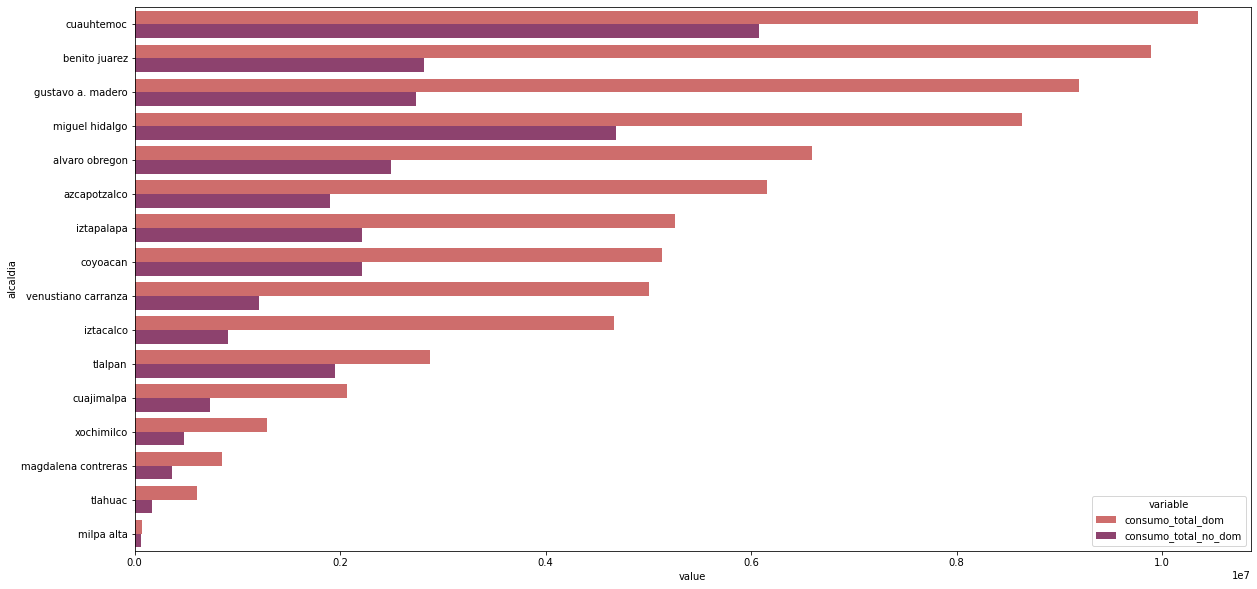

In [6]:
plt.figure(figsize=(20,10))
sns.barplot(x="value", y="alcaldia", data=dom_no, hue = 'variable',palette="flare")

#### NOTAS DEL EXPOSITOR (YUS):

Es claro que existe un mayor consumo de agua para el uso doméstico y que en la mayoría de los casos el no doméstico se encuentra al rededor de la mitad o menos.

Las alcaldías que lideran el consumo de agua de uso doméstico son la Cuauhtémoc, Benito Juárez y Gustavo A. Madero.

Para el consumo no doméstico tenemos a la Cuauhtémoc, Miguel Hidalgo y Benito Juárez.

Podemos cuestionarnos la definición exacta de uso doméstico o qué engloba pues si se incluyen las oficinas o corporativos en el uso no doméstico tiene sentido que la delegación Miguel Hidalgo esté en el top 3 pues ahí se concentran la mayoría de éstos.

### ¿Cuál es el comportamiento del índice de desarrollo de acuerdo al consumo de agua que tiene cada alcaldía?

In [7]:
ind_alcaldia = pd.DataFrame(agua, columns=['alcaldia','consumo_total','indice_des'])\
.groupby(['alcaldia','indice_des'], as_index=False).sum()\
.sort_values(by=['consumo_total'], ascending=False)

/home/ltejadal/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x144 with 0 Axes>

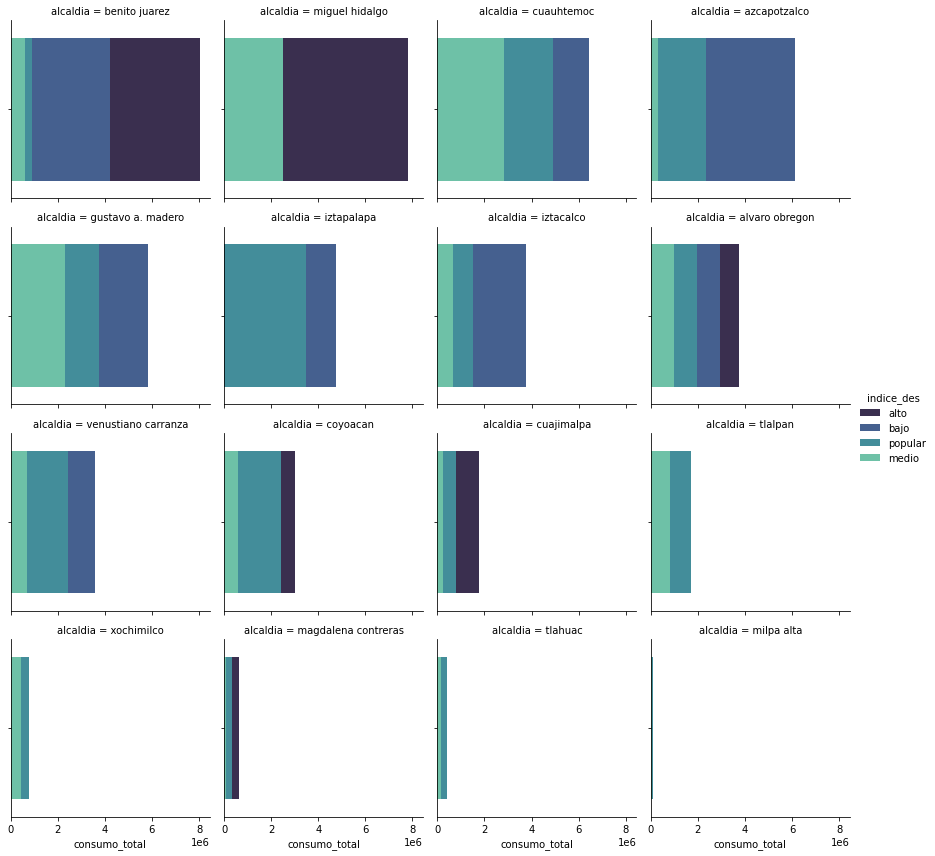

In [12]:
plt.figure(figsize=(10,2))
g=sns.FacetGrid(ind_alcaldia,col="alcaldia", col_wrap=4, hue="indice_des", palette="mako")
g.map(sns.barplot,"consumo_total")
g.add_legend()

#### NOTAS DEL EXPOSITOR (YUS):

Podemos ver que las dos alcaldías que tienen el mayor consumo total de agua, en este caso la Benito Juárez y Miguel Hidalgo tienen en común que el índice de desarrollo alto lidera su consumo.

En las demás alcaldías no hay un patrón claro que podamos encontrar en el consumo de agua y el índice de desarrollo. Aunque es interesante que en la Benito Juárez el consumo tenga una proporción muy similar entre el índice de desarrollo alto y bajo, dejando al medio con una proporción mínima, en contraste con la Miguel Hidalgo en la que tiene sentido que haya más consumo de agua de la población con un índice de desarrollo alto seguido del medio sin incluir el bajo y popular, ya que esta zona se caracteriza por tener los mejores servicios. Pensando de la misma forma en el tema de servicios o clase social encontramos que para la alcladía de Iztapalapa lidera su consumo con el índice de desarrollo popular seguido del bajo sin tomar el medio ni alto.

Otra cosa a destacar es que la proporción del índice de desarrollo respecto al consumo de agua en la alcaldía Álvaro Obregón es la más equilibrada. 

## Valores Faltantes

In [13]:
df = pd.read_csv('data_consumo_agua.csv')

In [14]:
df_missing_values = df.groupby(['bimestre', 'alcaldia'])\
                            .agg({'consumo_total_mixto': lambda x: x.isnull().sum(),
                           'consumo_total_dom': lambda x: x.isnull().sum(),
                           'consumo_total_no_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_mixto': lambda x: x.isnull().sum(),
                           'consumo_prom_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_no_dom': lambda x: x.isnull().sum()})\
                            .reset_index()
df_missing_values.head()

,bimestre,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom,consumo_prom_mixto,consumo_prom_dom,consumo_prom_no_dom
0,1,alvaro obregon,620.0,196.0,0.0,620.0,196.0,0.0
1,1,azcapotzalco,295.0,172.0,0.0,295.0,172.0,0.0
2,1,benito juarez,455.0,109.0,0.0,455.0,109.0,0.0
3,1,coyoacan,882.0,430.0,0.0,882.0,430.0,0.0
4,1,cuajimalpa,146.0,57.0,0.0,146.0,57.0,0.0


In [15]:
def funcion_nulos(df_missing_values):
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10))

    df_missing_values = df_missing_values.sort_values('consumo_prom_mixto', ascending=False)
    sns.barplot(ax=axes[0,0], x=df_missing_values['consumo_prom_mixto'], y=df_missing_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
    df_missing_values = df_missing_values.sort_values('consumo_prom_dom', ascending=False)
    sns.barplot(ax=axes[1,0], x=df_missing_values['consumo_prom_dom'], y=df_missing_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)

    df_missing_values = df_missing_values.sort_values('consumo_total_mixto', ascending=False)
    sns.barplot(ax=axes[0,1], x=df_missing_values['consumo_total_mixto'], y=df_missing_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
    df_missing_values = df_missing_values.sort_values('consumo_total_dom', ascending=False)
    sns.barplot(ax=axes[1,1], x=df_missing_values['consumo_total_dom'], y=df_missing_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)

    plt.xticks(rotation= 90)
    fig.show()

/home/ltejadal/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


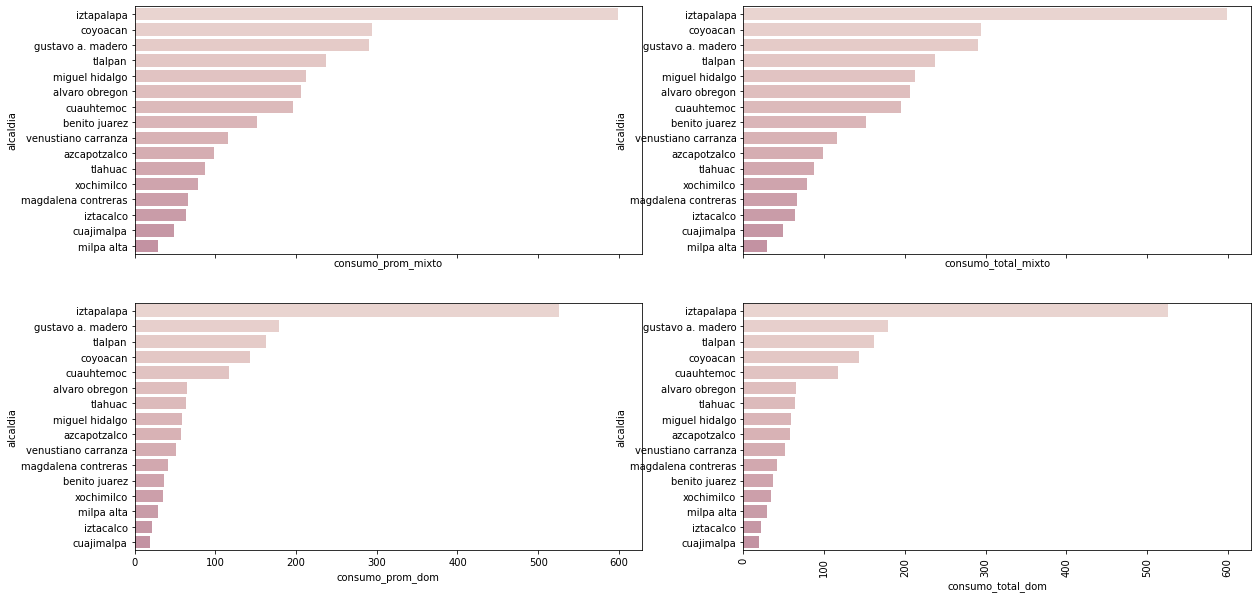

In [16]:
funcion_nulos(df_missing_values)

#### NOTAS DEL EXPOSITOR (LAU): - FALTA

 Lo primero que notamos es que todos los valores faltantes son en las variables numéricas, y que además todas ellas corresponden al primer bimestre del año, por lo que valdrá la pena comentar con negocio e investigar por qué únicamente en estas fechas nos falta información.
 
 Estas gráficas representan el número de valores faltantes para cada una de las alcaldías. Todos son en el primer bimestre (no hay NAs en los bimestres 2 y 3). Sólo hay valores faltantes para los domiciliados y mixtos, pero en los no domiciliados no hay valores faltantes. Además, los valores faltantes parecen ser más o menos proporcionales a la cantidad de registros que tenemos por alcaldía, por lo que no parece algo preocupante para el proyecto; sin embargo, sí tendríamos que hablar con negocio sobre la significativa falta de información en el primer bimestre.
 
  Los valores de la gráfica anterior, pero ¿qué pasa con la proporción de los datos faltantes según la cantidad de datos por alcaldía?

In [17]:
df_aux1 = df[ df.bimestre== 1 ].groupby(['alcaldia']).count()
df_aux1 = df_aux1 [['anio']] 
df_aux1.rename(columns={ 'anio': 'conteo'}, inplace=True)
df_per_miss_values = df_aux1.merge(df_missing_values[df_missing_values.bimestre == 1], on='alcaldia', how='left')

In [18]:
df_per_miss_values['consumo_total_mixto'] = df_per_miss_values.consumo_total_mixto/df_per_miss_values.conteo
df_per_miss_values['consumo_total_dom'] = df_per_miss_values.consumo_total_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_total_no_dom'] = df_per_miss_values.consumo_total_no_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_mixto'] = df_per_miss_values.consumo_prom_mixto/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_dom'] = df_per_miss_values.consumo_prom_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_no_dom'] = df_per_miss_values.consumo_prom_no_dom/df_per_miss_values.conteo

In [19]:
def funcion_per_nulos(df_per_miss_values):
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10))


    df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_mixto', ascending=False)
    sns.barplot(ax=axes[0,0], x=df_per_miss_values['consumo_prom_mixto'], y=df_per_miss_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)
    df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_dom', ascending=False)
    sns.barplot(ax=axes[1,0], x=df_per_miss_values['consumo_prom_dom'], y=df_per_miss_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)

    df_per_miss_values = df_per_miss_values.sort_values('consumo_total_mixto', ascending=False)
    sns.barplot(ax=axes[0,1], x=df_per_miss_values['consumo_total_mixto'], y=df_per_miss_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)
    df_per_miss_values = df_per_miss_values.sort_values('consumo_total_dom', ascending=False)
    sns.barplot(ax=axes[1,1], x=df_per_miss_values['consumo_total_dom'], y=df_per_miss_values['alcaldia'],
                     palette=sns.cubehelix_palette(len(df_per_miss_values['alcaldia'])), ci=0)

    plt.xticks(rotation= 90)
    plt.show()

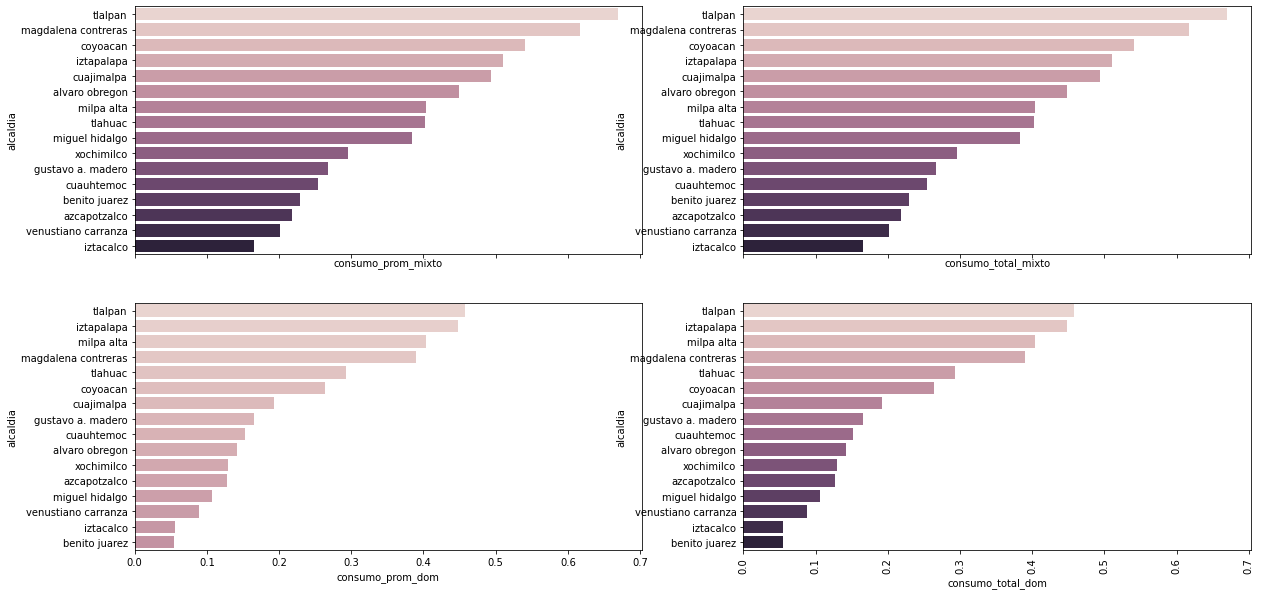

In [20]:
funcion_per_nulos(df_per_miss_values)

#### NOTAS DEL EXPOSITOR (LAU): FALTA